import pandas as pd: Imports the pandas library and assigns it the alias "pd". This library provides data manipulation and analysis tools.

import numpy as np: Imports the numpy library and assigns it the alias "np". This library provides support for large, multi-dimensional arrays and mathematical functions.

from plotnine import *: Imports all symbols from the plotnine library. Plotnine is a plotting package for Python based on the Grammar of Graphics.

import warnings: Imports the warnings module, which allows you to control the display of warnings.

warnings.filterwarnings('ignore'): Sets the warning filter to "ignore", which means that warnings will be suppressed and not displayed.

from sklearn.preprocessing import StandardScaler: Imports the StandardScaler class from the preprocessing module of scikit-learn. StandardScaler is used to standardize features by removing the mean and scaling to unit variance.

from sklearn.cluster import KMeans: Imports the KMeans class from the cluster module of scikit-learn. KMeans is an algorithm for clustering data based on the concept of centroids.

from sklearn.mixture import GaussianMixture: Imports the GaussianMixture class from the mixture module of scikit-learn. GaussianMixture is an algorithm for fitting a Gaussian mixture model to the data.

from sklearn.metrics import silhouette_score: Imports the silhouette_score function from the metrics module of scikit-learn. silhouette_score is a metric for evaluating the quality of clustering.

%matplotlib inline: Configures the Jupyter Notebook to display plots inline, within the notebook itself.

In [23]:
import pandas as pd
import numpy as np
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 

from sklearn.metrics import silhouette_score

%matplotlib inline

pd: The pandas library, previously imported as pd, is used to access its functions and classes.

read_csv(): This is a function provided by pandas to read CSV (Comma-Separated Values) files. It takes a file path as an argument and returns a DataFrame, which is a tabular data structure provided by pandas.

'/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv': This is the file path to the CSV file that is being read. It specifies the location of the file on the system.

In [24]:
df = pd.read_csv('/kaggle/input/burger-king-menu-nutrition-data/burger-king-menu.csv')

df: Refers to the DataFrame variable that was previously assigned when reading the CSV file.

head(): This method is called on a DataFrame and is used to retrieve the first few rows of the DataFrame. By default, it returns the first 5 rows, but you can specify a different number inside the parentheses to retrieve a different number of rows.

By calling df.head(), you are displaying the first 5 rows of the DataFrame df, which allows you to quickly inspect the data and get an overview of its structure and contents.

In [25]:
df.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


df: Refers to the DataFrame variable that was previously assigned when reading the CSV file.

shape: This is an attribute of the DataFrame object that returns the shape of the DataFrame as a tuple in the format (number of rows, number of columns).

By calling df.shape, you retrieve the shape of the DataFrame df, which can be useful to understand the size and structure of the dataset. For example, if df.shape returns (100, 5), it means that df contains 100 rows and 5 columns.

In [26]:
df.shape

(77, 14)

features = ["Calories", "Sodium (mg)"]: Creates a list named features containing the names of two columns, "Calories" and "Sodium (mg)". These columns will be used as features for clustering.

X = df[features]: Creates a new DataFrame X by selecting only the columns specified in the features list from the original DataFrame df. This will be the data used for clustering.

z = StandardScaler(): Creates an instance of the StandardScaler class from scikit-learn. This scaler will be used to standardize the features of X.

X[features] = z.fit_transform(X): Standardizes the features in X using the StandardScaler object z. This line replaces the original values in X with their standardized counterparts.

EM = GaussianMixture(n_components=3): Creates an instance of the GaussianMixture class from scikit-learn. This class represents a Gaussian mixture model with a specified number of components (in this case, 3).

EM.fit(X): Fits the Gaussian mixture model EM to the data in X, estimating the parameters of the model based on the data.

cluster = EM.predict(X): Assigns each data point in X to a cluster based on the fitted Gaussian mixture model EM. The predicted cluster labels are stored in the cluster variable.

print("Silhouette: ", silhouette_score(X, cluster)): Calculates the silhouette score of the clustering result using the silhouette_score function from scikit-learn. The silhouette score measures the quality of clustering, where higher values indicate better-defined clusters. The score is printed to the console.

X["cluster"] = cluster: Adds a new column named "cluster" to the DataFrame X and assigns the cluster labels from the cluster variable to that column. This column represents the cluster assignment for each data point.

(ggplot(X, aes(x="Calories", y="Sodium (mg)", color="cluster")) + geom_point()): Creates a scatter plot using the ggplot function from the plotnine library. The X DataFrame is used as the data source, and the "Calories" and "Sodium (mg)" columns are mapped to the x and y axes, respectively. The points are colored based on the "cluster" column. The resulting plot is displayed.

In [27]:
features = ["Calories", "Sodium (mg)"]
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3) 
EM.fit(X) 
cluster = EM.predict(X)
print("Silhouette: ", silhouette_score(X, cluster))
X["cluster"] = cluster


Silhouette:  0.4821947256051119


A silhouette score of 0.4821947256051119, it suggests a moderate level of separation and cohesion within the clusters. While it may not represent a perfectly defined clustering solution, it is still indicative of some level of distinguishability between clusters.

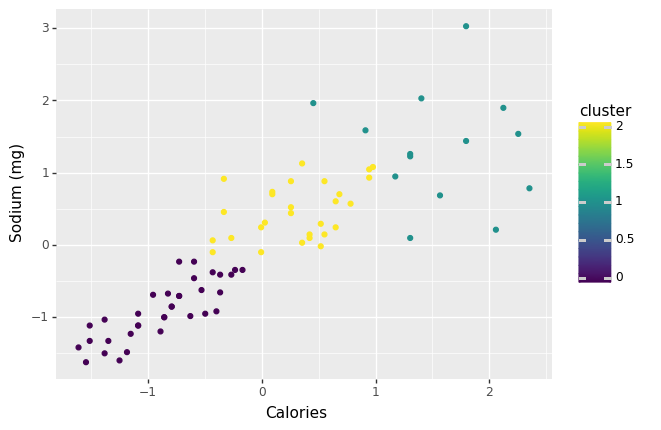

<ggplot: (8610480354004)>

In [28]:
(ggplot(X, aes(x= "Calories", y = "Sodium (mg)", color = "cluster"  )) + geom_point())

## Multiple dimensions

In [29]:
features = ["Sugars (g)", "Protein (g)", "Fat (g)"]
X = df[features]
z = StandardScaler()
X[features] = z.fit_transform(X)
EM = GaussianMixture(n_components = 3) 
EM.fit(X) 
cluster = EM.predict(X)
cluster

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
print("Silhouette: ", silhouette_score(X, cluster))

Silhouette:  0.4087828785565075


With a silhouette score of 0.4006508103803884, it indicates some level of separation and cohesion within the clusters, but it may not represent a highly distinct or well-defined clustering solution. It suggests that the clusters have some degree of distinguishability, but there might be some overlap or ambiguity present.

In [31]:
X["cluster"] = cluster

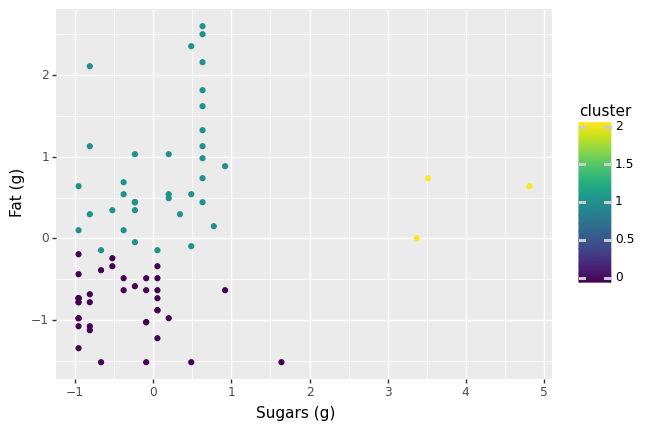

<ggplot: (8610478968127)>

In [32]:
(ggplot(X, aes(x= "Sugars (g)", y = "Fat (g)", color = "cluster"  )) + geom_point())

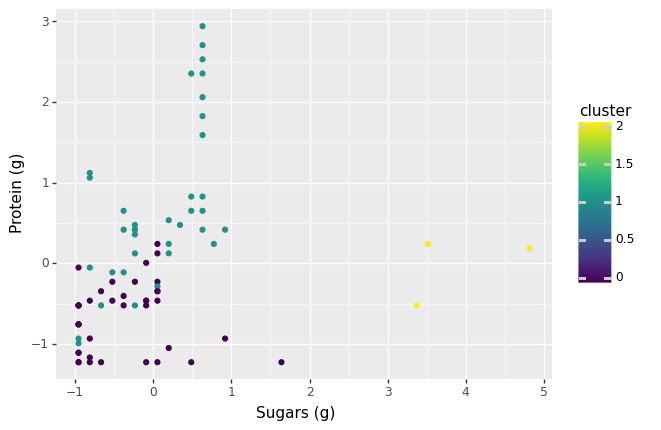

<ggplot: (8610479010813)>

In [33]:
(ggplot(X, aes(x= "Sugars (g)", y = "Protein (g)", color = "cluster"  )) + geom_point())

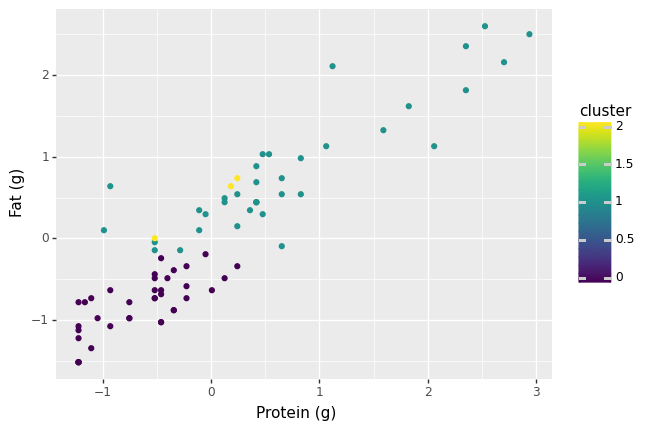

<ggplot: (8610478927806)>

In [34]:
(ggplot(X, aes(x= "Protein (g)", y = "Fat (g)", color = "cluster"  )) + geom_point())

## What is a ggplot?


ggplot is a plotting library in Python that is based on the grammar of graphics. It is inspired by the popular R package called ggplot2. The library provides a high-level interface for creating visually appealing and customizable statistical graphics.

The main idea behind ggplot is to decompose a plot into its fundamental components, such as data, aesthetics (visual mappings), geometric objects, and scales. This approach allows for a flexible and layered approach to creating plots.

Key features and concepts of ggplot include:

Data: The data to be plotted is typically provided as a pandas DataFrame.

Aesthetics: Aesthetics represent the visual mappings of the data attributes to plot elements such as position, color, size, shape, etc. They are defined using the aes() function.

Geometric objects (geoms): Geoms represent the geometric shapes used to represent the data points. Examples of geoms include points, lines, bars, histograms, etc.

Scales: Scales map the data values to aesthetic properties, such as mapping numerical values to color gradients or categorical values to different shapes.

Layers: Plots in ggplot are built by adding layers of data, aesthetics, and geoms. Each layer represents a different aspect of the plot.

Themes: Themes control the overall visual appearance of the plot, including elements like fonts, colors, backgrounds, and gridlines.

By combining these components, ggplot allows you to create complex and highly customizable visualizations with a clean and intuitive syntax.

The ggplot library you mentioned is likely a reference to the plotnine library, which is a Python implementation of ggplot based on the grammar of graphics. It provides a similar interface and functionality to create plots following the principles of ggplot2 in R.

## What is a geom_point()?



In ggplot, geom_point() is a geometric object (geom) that represents data points as individual dots on a plot. It is used to create scatter plots where each point represents a data observation.

## What does the number of components mean in GaussianMixture 

In the context of the GaussianMixture class in scikit-learn, the "number of components" refers to the number of Gaussian distributions (also known as components or clusters) that will be used to model the data.

When you create an instance of the GaussianMixture class, you need to specify the n_components parameter, which determines the number of Gaussian distributions to be fitted to the data. Each component represents a cluster in the data.

## What is a silhouette_score?


The silhouette score is a metric used to evaluate the quality of clustering results. It measures how well the data points within each cluster are separated from each other and how well they are assigned to their respective clusters.



The silhouette score ranges from -1 to 1, where:
* A score close to 1 indicates that the data points are well-clustered, with good separation between clusters and tight intra-cluster cohesion.
* A score close to 0 suggests overlapping or ambiguous clusters, where data points may be assigned to incorrect clusters or there is significant overlap between clusters.
* A score close to -1 indicates that the data points are incorrectly clustered, and they may be more similar to data points in other clusters than to those in their own cluster.

A higher silhouette score indicates better-defined and more separated clusters, while a lower score suggests suboptimal clustering or overlap between clusters.

The silhouette score is a useful metric for comparing different clustering algorithms, evaluating different parameter settings (such as the number of clusters), or selecting the best clustering solution. However, it's important to note that the silhouette score has limitations and should be used in conjunction with other evaluation measures and domain knowledge when assessing clustering results.